# Problem 5

In [1]:
# Importing relevant packages and doing necessary setup
import cv2
import matplotlib.pyplot as plt
import matplotlib
import PIL
import numpy as np
import time
from copy import deepcopy
%matplotlib inline

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [2]:
# Helper function to display multiple images in a plot
def display_images(images, rows, cols, size, title, subtitles):
    fig = plt.figure(figsize = size)
    c = 0
    sz = len(images)
    for i in range(rows):
        for j in range(cols):
            if sz == c:
                break
            ax1 = fig.add_subplot(rows, cols, c + 1)
            ax1.imshow(images[c], cmap = 'gray')
            ax1.set_title(subtitles[c], fontsize = 20)
            c = c + 1
    plt.show()
    # Un comment the below line and comment the above line to save and display
    #plt.savefig('part2.png')

### Part 1

In [3]:
def inefficient_average_filter(img, sz):
    img = img.astype(np.float64)
    row = img.shape[0]
    col = img.shape[1]
    res = np.zeros(img.shape)
    for i in range(int(sz / 2), row - int(sz / 2)):
        for j in range(int(sz / 2), col - int(sz / 2)):
            for k in range(i - int(sz / 2), i + int(sz / 2) + 1):
                for l in range(j - int(sz / 2), j + int(sz / 2) + 1):
                    res[i][j] = res[i][j] + img[k][l]
            res[i][j] = res[i][j] / (sz * sz)
    return res

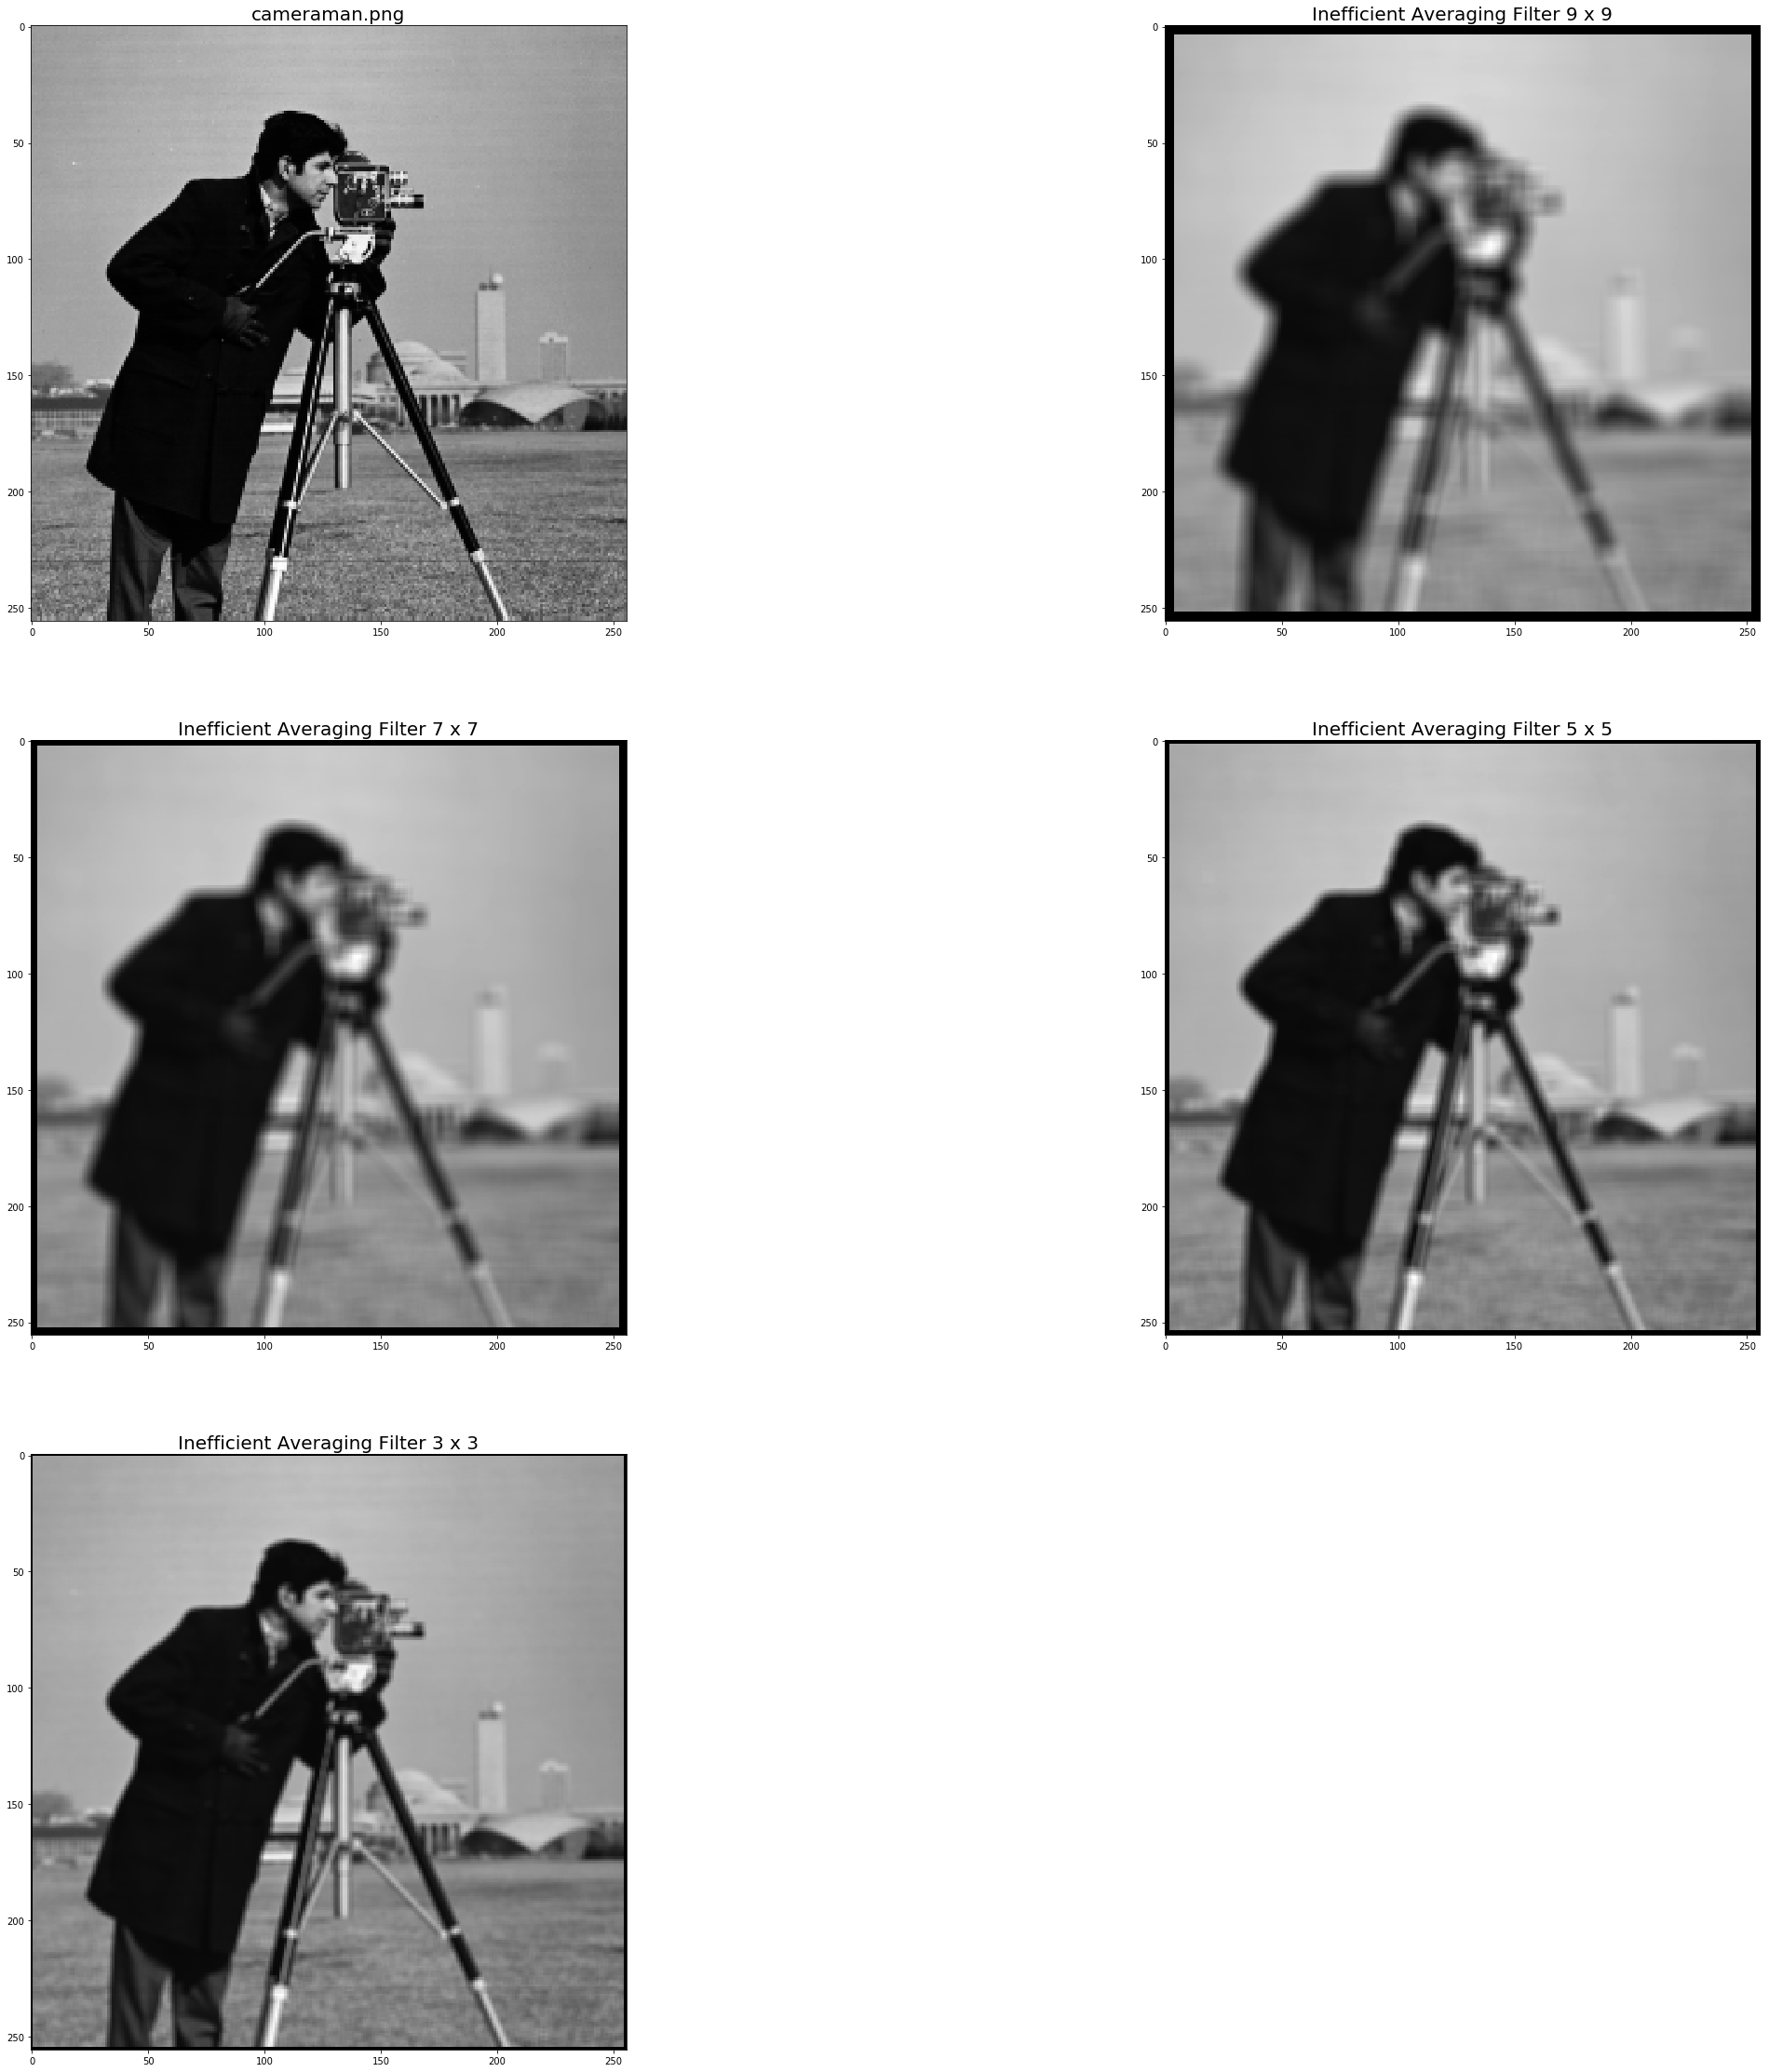

In [4]:
images = []
subtitles = []
inefficient_time = []
img = cv2.imread('../input_data/cameraman.png', cv2.IMREAD_GRAYSCALE)
images.append(img)

startTime = time.time()
output = inefficient_average_filter(img, 9)
inefficient_time.append(time.time() - startTime)
images.append(output)

startTime = time.time()
output = inefficient_average_filter(img, 7)
inefficient_time.append(time.time() - startTime)
images.append(output)

startTime = time.time()
output = inefficient_average_filter(img, 5)
inefficient_time.append(time.time() - startTime)
images.append(output)

startTime = time.time()
output = inefficient_average_filter(img, 3)
inefficient_time.append(time.time() - startTime)
images.append(output)


subtitles.append('cameraman.png')
subtitles.append('Inefficient Averaging Filter 9 x 9')
subtitles.append('Inefficient Averaging Filter 7 x 7')
subtitles.append('Inefficient Averaging Filter 5 x 5')
subtitles.append('Inefficient Averaging Filter 3 x 3')

display_images(images, 3, 2, (40, 40), 'title', subtitles)

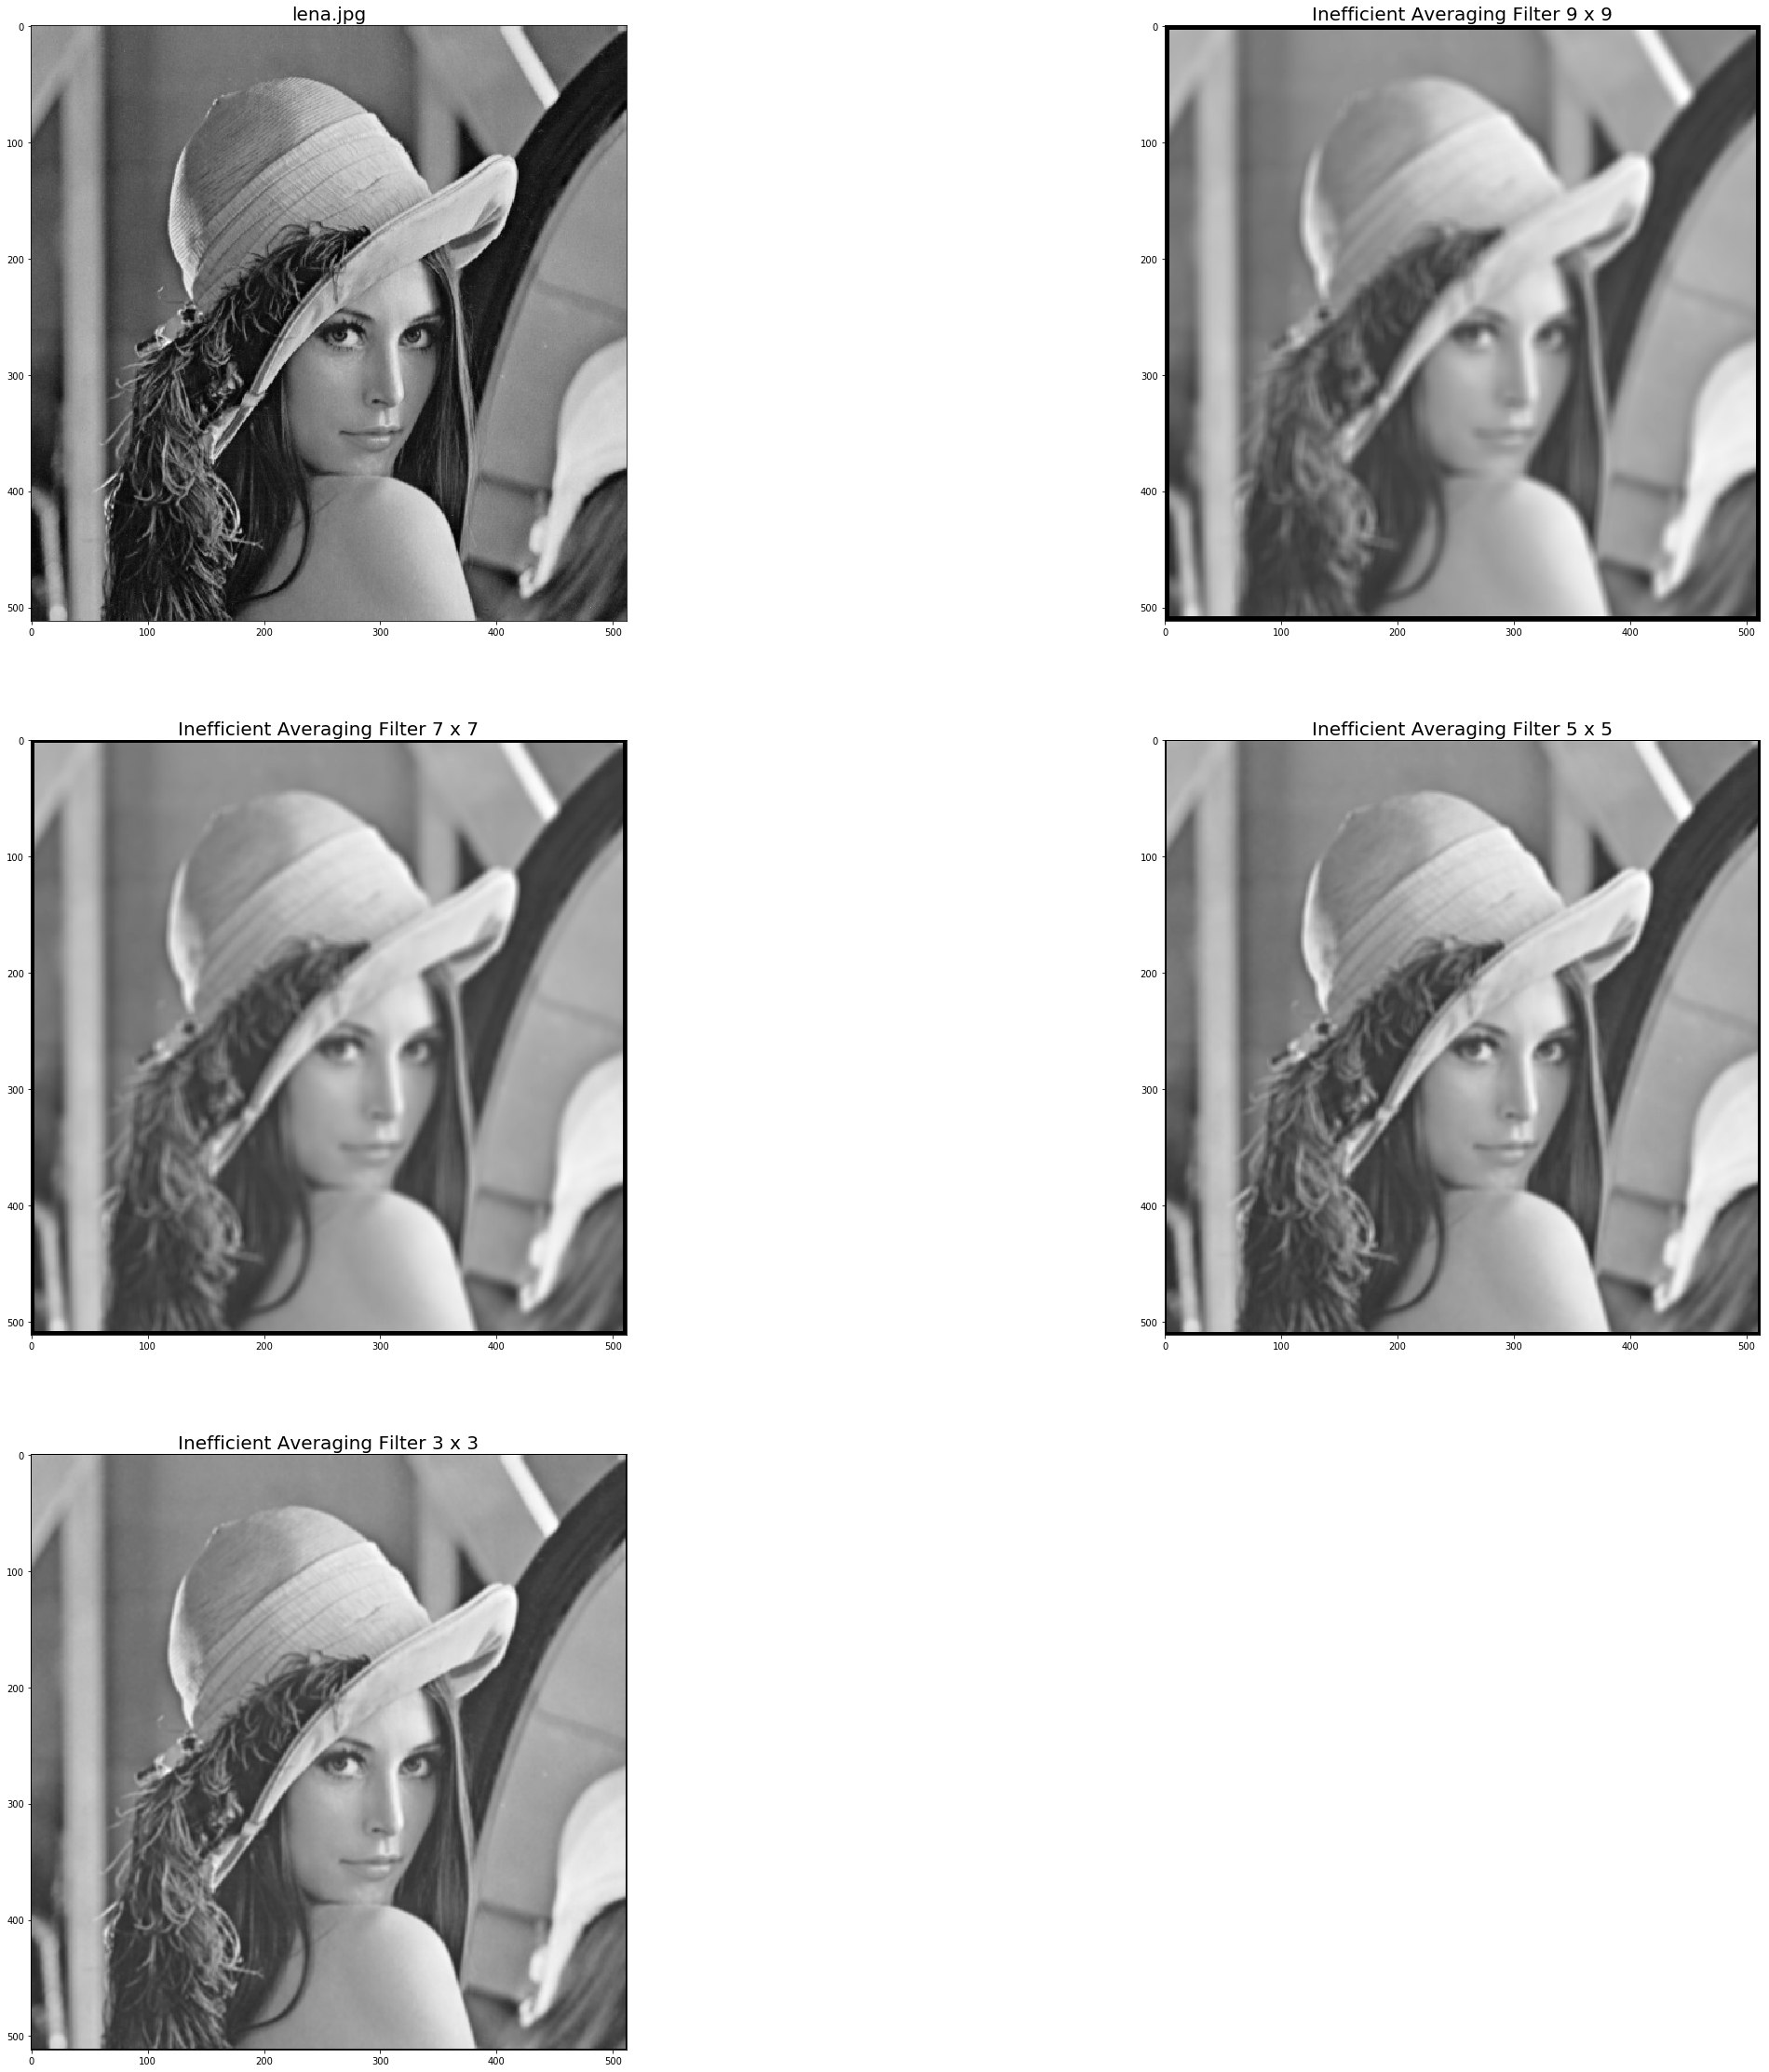

In [5]:
images = []
subtitles = []
inefficient_time_lena = []
img = cv2.imread('../input_data/lena.jpg', cv2.IMREAD_GRAYSCALE)
images.append(img)

startTime = time.time()
output = inefficient_average_filter(img, 9)
inefficient_time_lena.append(time.time() - startTime)
images.append(output)

startTime = time.time()
output = inefficient_average_filter(img, 7)
inefficient_time_lena.append(time.time() - startTime)
images.append(output)

startTime = time.time()
output = inefficient_average_filter(img, 5)
inefficient_time_lena.append(time.time() - startTime)
images.append(output)

startTime = time.time()
output = inefficient_average_filter(img, 3)
inefficient_time_lena.append(time.time() - startTime)
images.append(output)


subtitles.append('lena.jpg')
subtitles.append('Inefficient Averaging Filter 9 x 9')
subtitles.append('Inefficient Averaging Filter 7 x 7')
subtitles.append('Inefficient Averaging Filter 5 x 5')
subtitles.append('Inefficient Averaging Filter 3 x 3')

display_images(images, 3, 2, (40, 40), 'title', subtitles)

### Part 2

In [6]:
def efficient_average_filter(img, sz):
    img = img.astype(np.float64)
    row = img.shape[0]
    col = img.shape[1]
    res = np.zeros(img.shape)
    tmp = np.zeros(img.shape)
    cum = np.zeros(img.shape)
    for i in range(row):
        cum[i][0] = img[i][0]
        for j in range(1, sz):
            cum[i][j] = cum[i][j - 1] + img[i][j]
        for j in range(sz, col):
            cum[i][j] = cum[i][j - 1] - img[i][j - sz] + img[i][j]
    for i in range(col):
        tmp[0][i] = cum[0][i]
        for j in range(1, sz):
            tmp[j][i] = tmp[j - 1][i] + cum[j][i]
        for j in range(sz, row):
            tmp[j][i] = tmp[j - 1][i] - cum[j - sz][i] + cum[j][i]
    for i in range(int(sz / 2), row - int(sz / 2)):
        for j in range(int(sz / 2), col - int(sz / 2)):
            res[i][j] = tmp[i + int(sz / 2)][j + int(sz / 2)] / (sz * sz)
    return res

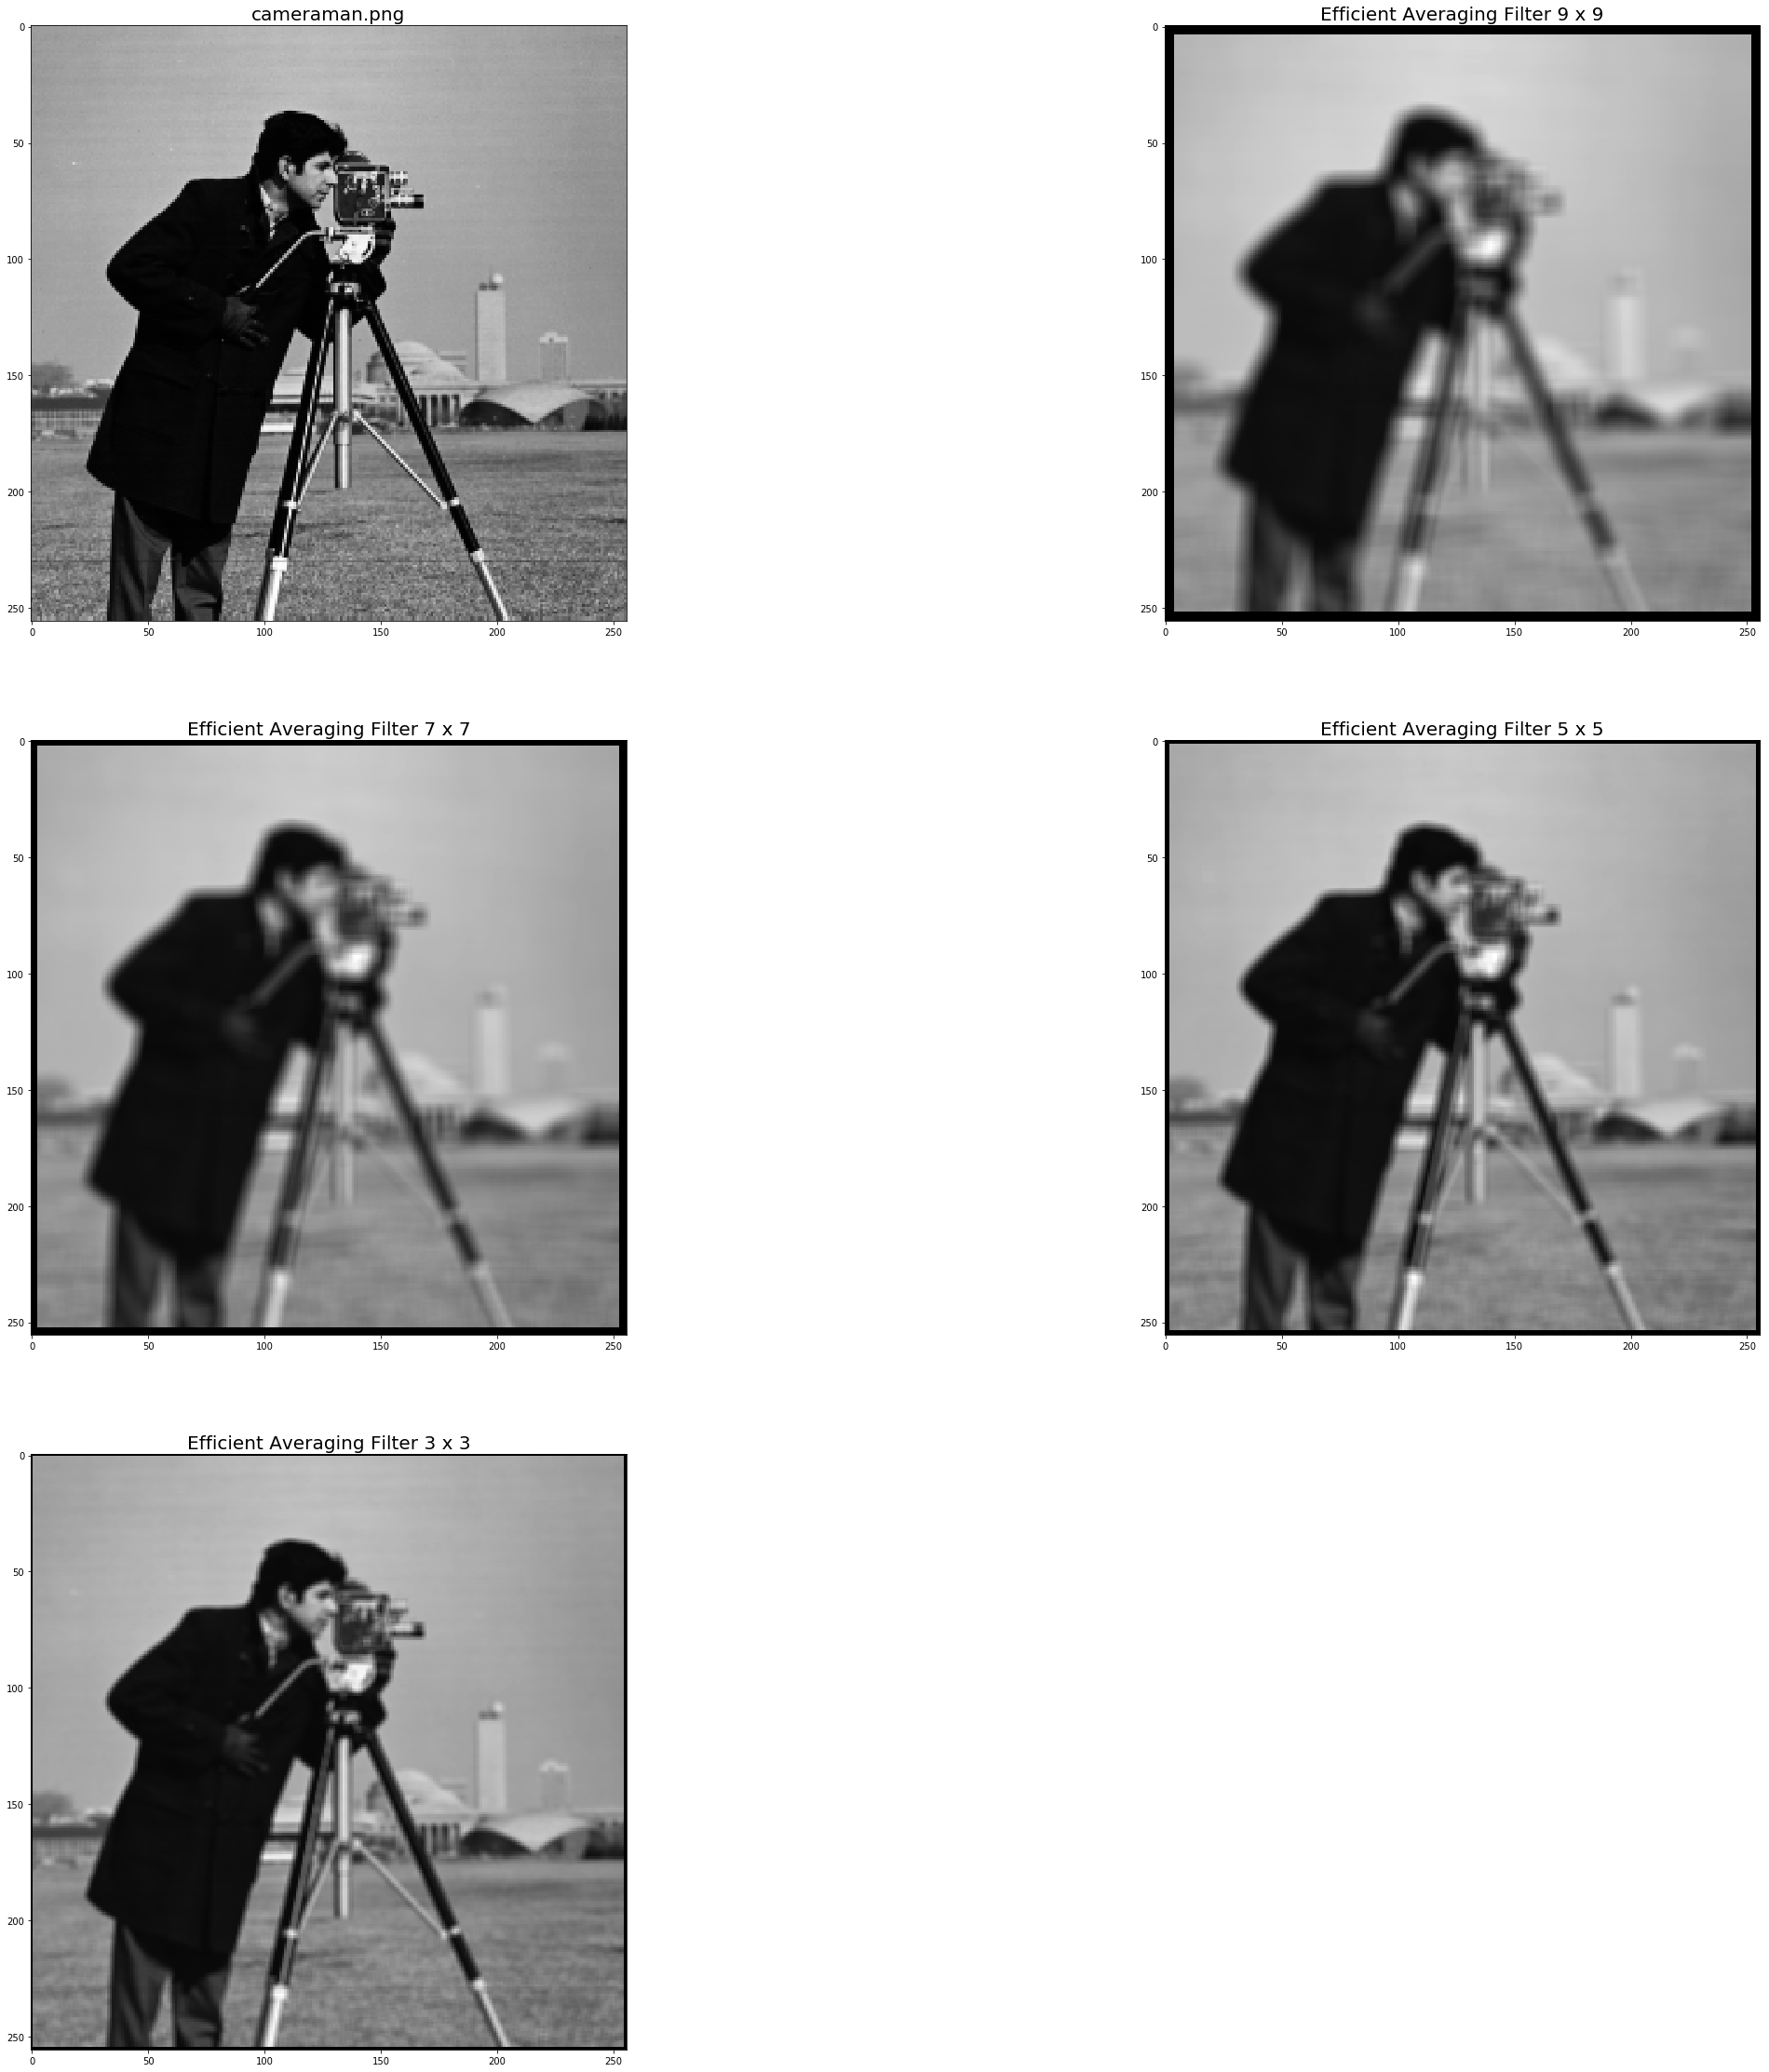

In [7]:
images = []
subtitles = []
efficient_time = []
img = cv2.imread('../input_data/cameraman.png', cv2.IMREAD_GRAYSCALE)
images.append(img)

startTime = time.time()
output = efficient_average_filter(img, 9)
efficient_time.append(time.time() - startTime)
images.append(output)

startTime = time.time()
output = efficient_average_filter(img, 7)
efficient_time.append(time.time() - startTime)
images.append(output)

startTime = time.time()
output = efficient_average_filter(img, 5)
efficient_time.append(time.time() - startTime)
images.append(output)

startTime = time.time()
output = efficient_average_filter(img, 3)
efficient_time.append(time.time() - startTime)
images.append(output)


subtitles.append('cameraman.png')
subtitles.append('Efficient Averaging Filter 9 x 9')
subtitles.append('Efficient Averaging Filter 7 x 7')
subtitles.append('Efficient Averaging Filter 5 x 5')
subtitles.append('Efficient Averaging Filter 3 x 3')

display_images(images, 3, 2, (40, 40), 'title', subtitles)

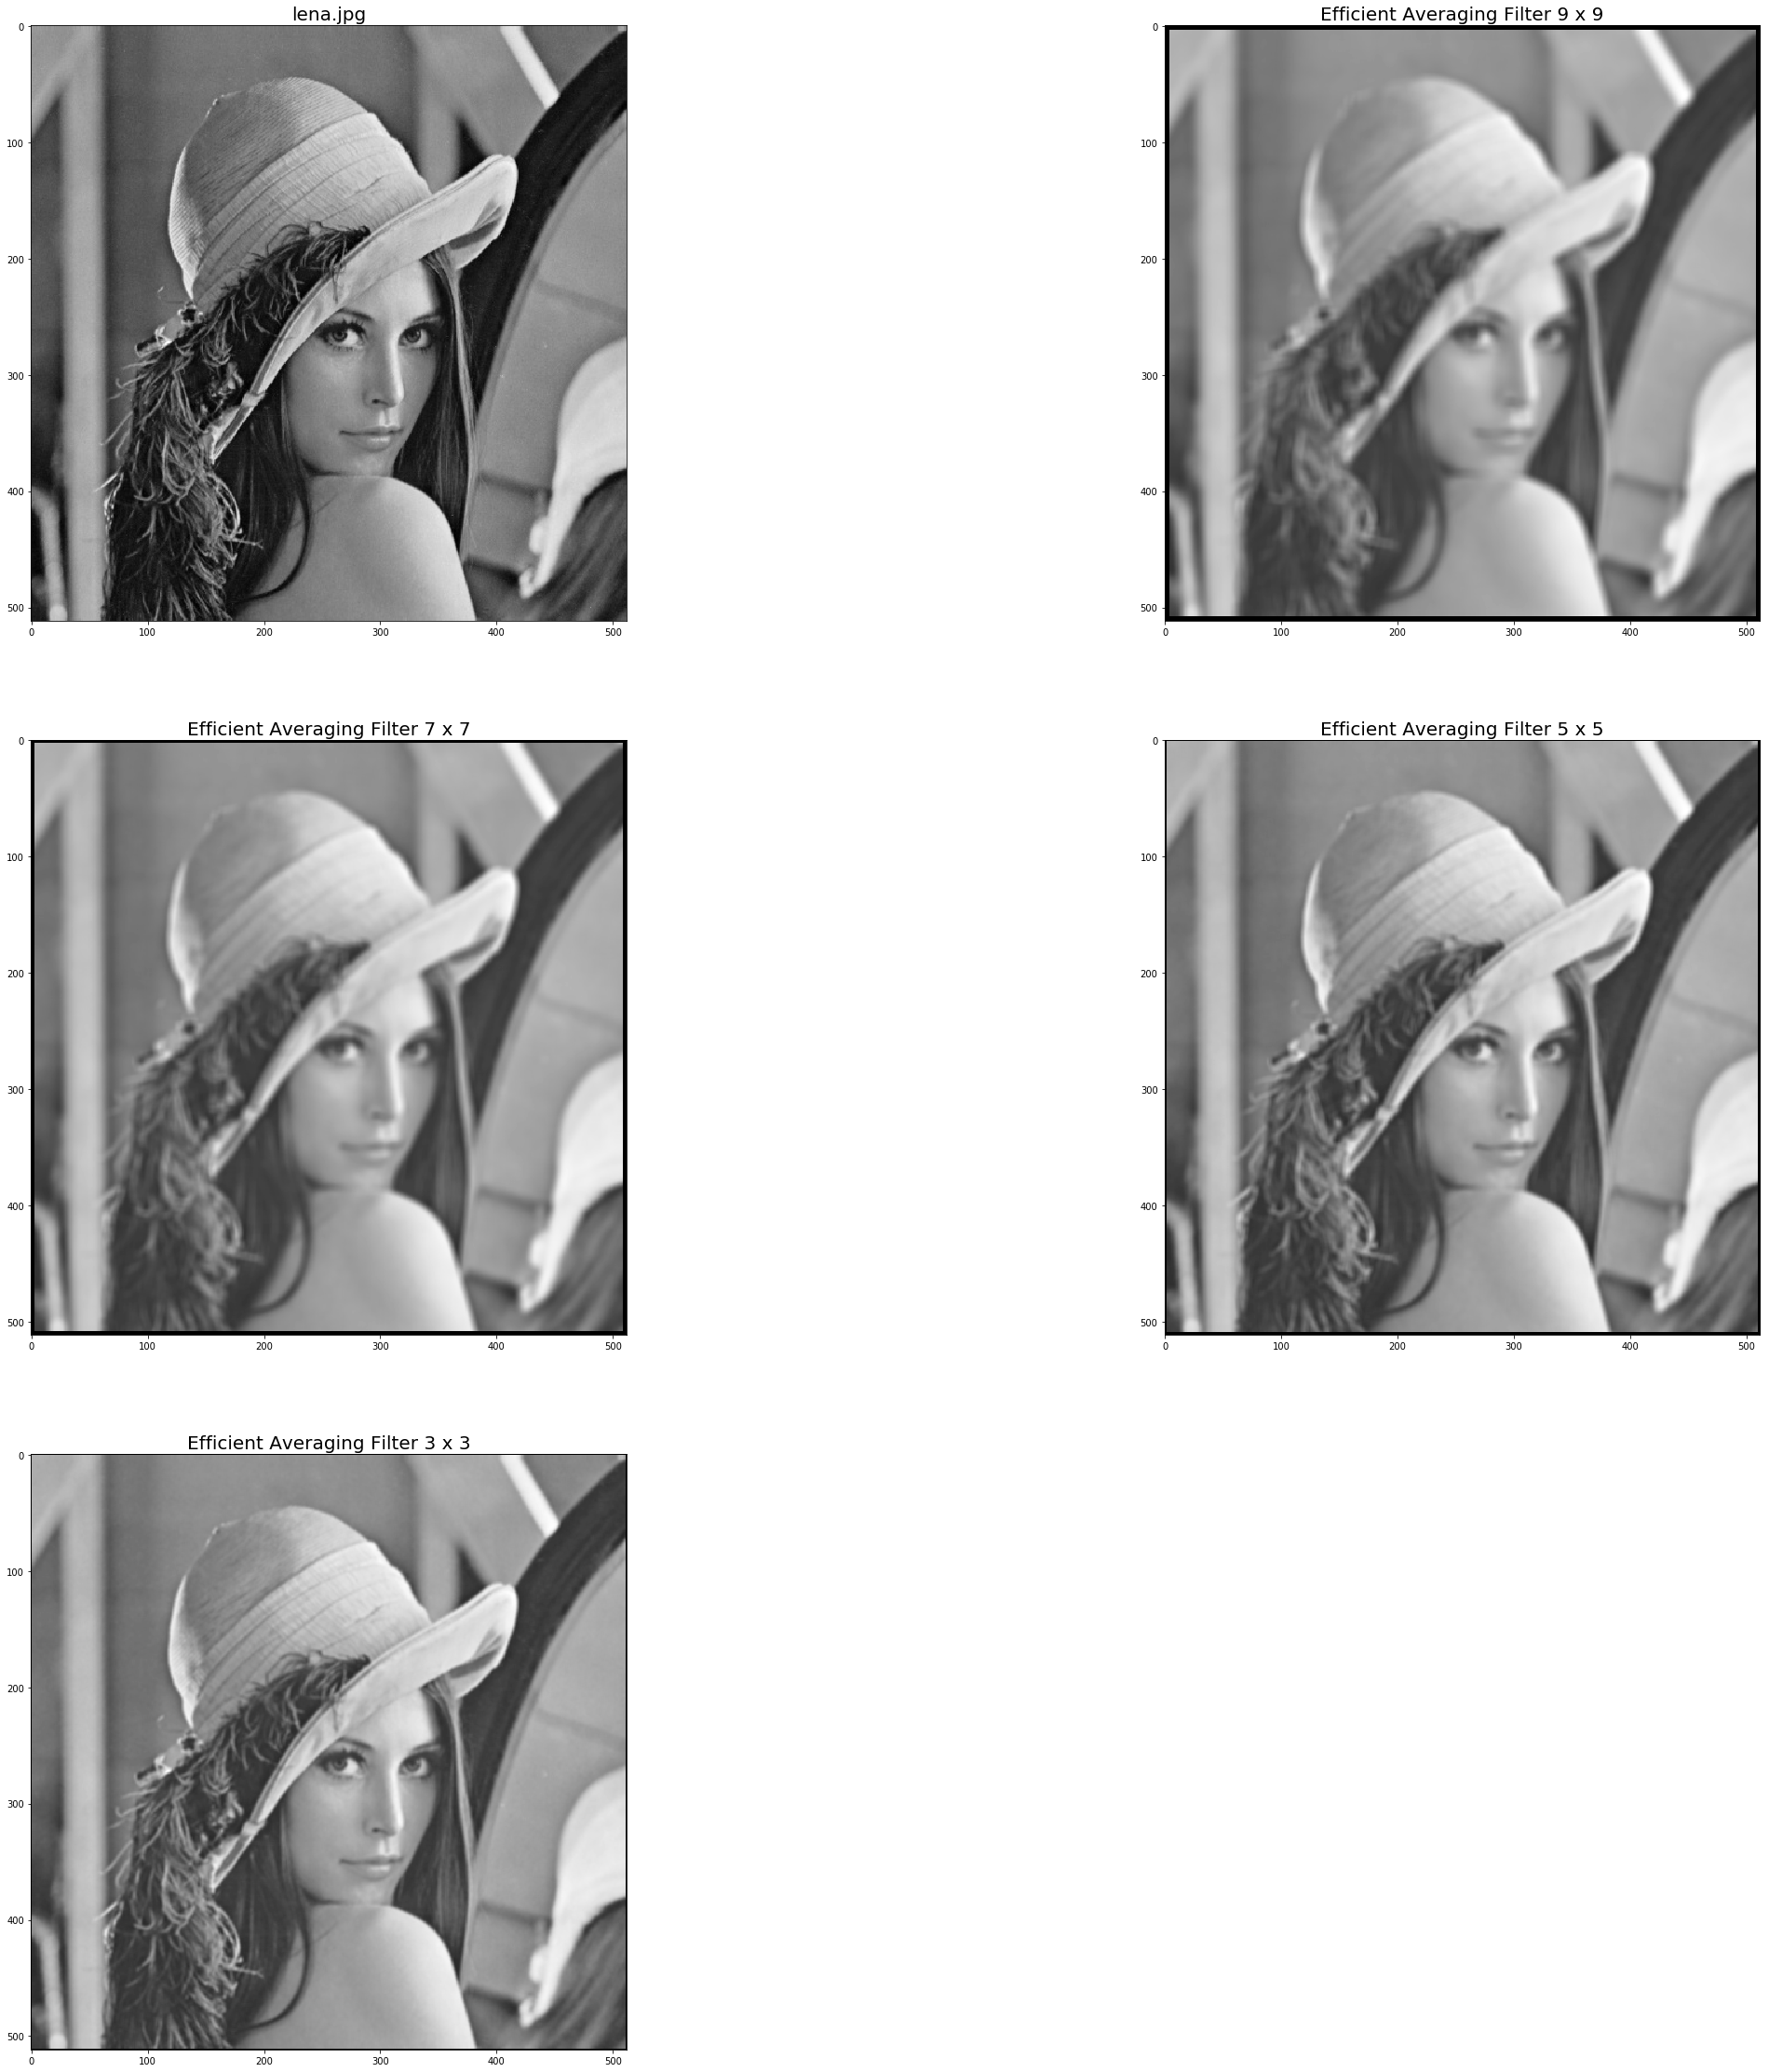

In [8]:
images = []
subtitles = []
efficient_time_lena = []
img = cv2.imread('../input_data/lena.jpg', cv2.IMREAD_GRAYSCALE)
images.append(img)

startTime = time.time()
output = efficient_average_filter(img, 9)
efficient_time_lena.append(time.time() - startTime)
images.append(output)

startTime = time.time()
output = efficient_average_filter(img, 7)
efficient_time_lena.append(time.time() - startTime)
images.append(output)

startTime = time.time()
output = efficient_average_filter(img, 5)
efficient_time_lena.append(time.time() - startTime)
images.append(output)

startTime = time.time()
output = efficient_average_filter(img, 3)
efficient_time_lena.append(time.time() - startTime)
images.append(output)


subtitles.append('lena.jpg')
subtitles.append('Efficient Averaging Filter 9 x 9')
subtitles.append('Efficient Averaging Filter 7 x 7')
subtitles.append('Efficient Averaging Filter 5 x 5')
subtitles.append('Efficient Averaging Filter 3 x 3')

display_images(images, 3, 2, (40, 40), 'title', subtitles)

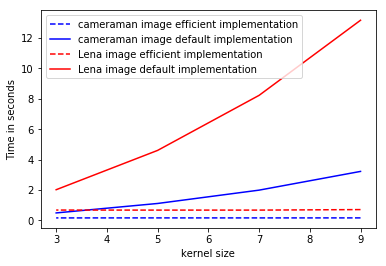

In [9]:
k = [9, 7, 5, 3]
plt.plot(k, efficient_time, 'b--', label = 'cameraman image efficient implementation')
plt.plot(k, inefficient_time, 'b-', label = 'cameraman image default implementation')
plt.plot(k, efficient_time_lena, 'r--', label = 'Lena image efficient implementation')
plt.plot(k, inefficient_time_lena, 'r-', label = 'Lena image default implementation')
plt.xlabel('kernel size')
plt.ylabel('Time in seconds')
plt.gca().legend()
plt.show()

### Part 3

In [10]:
def inefficient_median_filter(img, sz):
    row = img.shape[0]
    col = img.shape[1]
    res = np.zeros(img.shape)
    for i in range(int(sz / 2), row - int(sz / 2)):
        for j in range(int(sz / 2), col - int(sz / 2)):
            ls = []
            for k in range(i - int(sz / 2), i + int(sz / 2) + 1):
                for l in range(j - int(sz / 2), j + int(sz / 2) + 1):
                    ls.append(img[k][l])
            ls.sort()
            res[i][j] = ls[int(len(ls) / 2)]
    return res.astype(np.uint8)

In [11]:
def efficient_median_filter(img, sz):
    curr = np.zeros(256)
    mem = np.zeros(256)
    row = img.shape[0]
    col = img.shape[1]
    res = np.zeros(img.shape)
    C = 0
    for i in range(sz):
        for j in range(sz):
            mem[img[i][j]] = mem[img[i][j]] + 1
    for i in range(256):
        C = C + mem[i]
        if C > int(sz * sz * 1.0 / 2):
            res[int(sz / 2)][int(sz / 2)] = i
            break
    
    curr = deepcopy(mem)
    for i in range(int(sz * 1.0/ 2), row - int(sz * 1.0/ 2)):
        for j in range(int(sz * 1.0/ 2), col - int(sz * 1.0/ 2)):
            if i > int(sz * 1.0 / 2) and j == int(sz * 1.0 / 2):
                # remove row i - int(sz / 2) - 1 and add row i + int(sz / 2)
                curr = mem
                for k in range(j - int(sz / 2), j + int(sz / 2) + 1):
                    curr[img[i - int(sz / 2) - 1][k]] = curr[img[i - int(sz / 2) - 1][k]] - 1
                    curr[img[i + int(sz / 2)][k]] = curr[img[i + int(sz / 2)][k]] + 1
                cum = 0
                for k in range(256):
                    cum = cum + curr[k]
                    if cum > int(sz * sz * 1.0 / 2):
                        res[i][j] = k
                        break
                mem = deepcopy(curr)
            else:
                for k in range(i - int(sz / 2), i + int(sz / 2) + 1):
                    curr[img[k][j - int(sz / 2) - 1]] = curr[img[k][j - int(sz / 2) - 1]] - 1
                    curr[img[k][j + int(sz / 2)]] = curr[img[k][j + int(sz / 2)]] + 1
                # Find Median from curr
                cum = 0
                for k in range(256):
                    cum = cum + curr[k]
                    if cum > int(sz * sz * 1.0 / 2):
                        res[i][j] = k
                        break
    return res.astype(np.uint8)

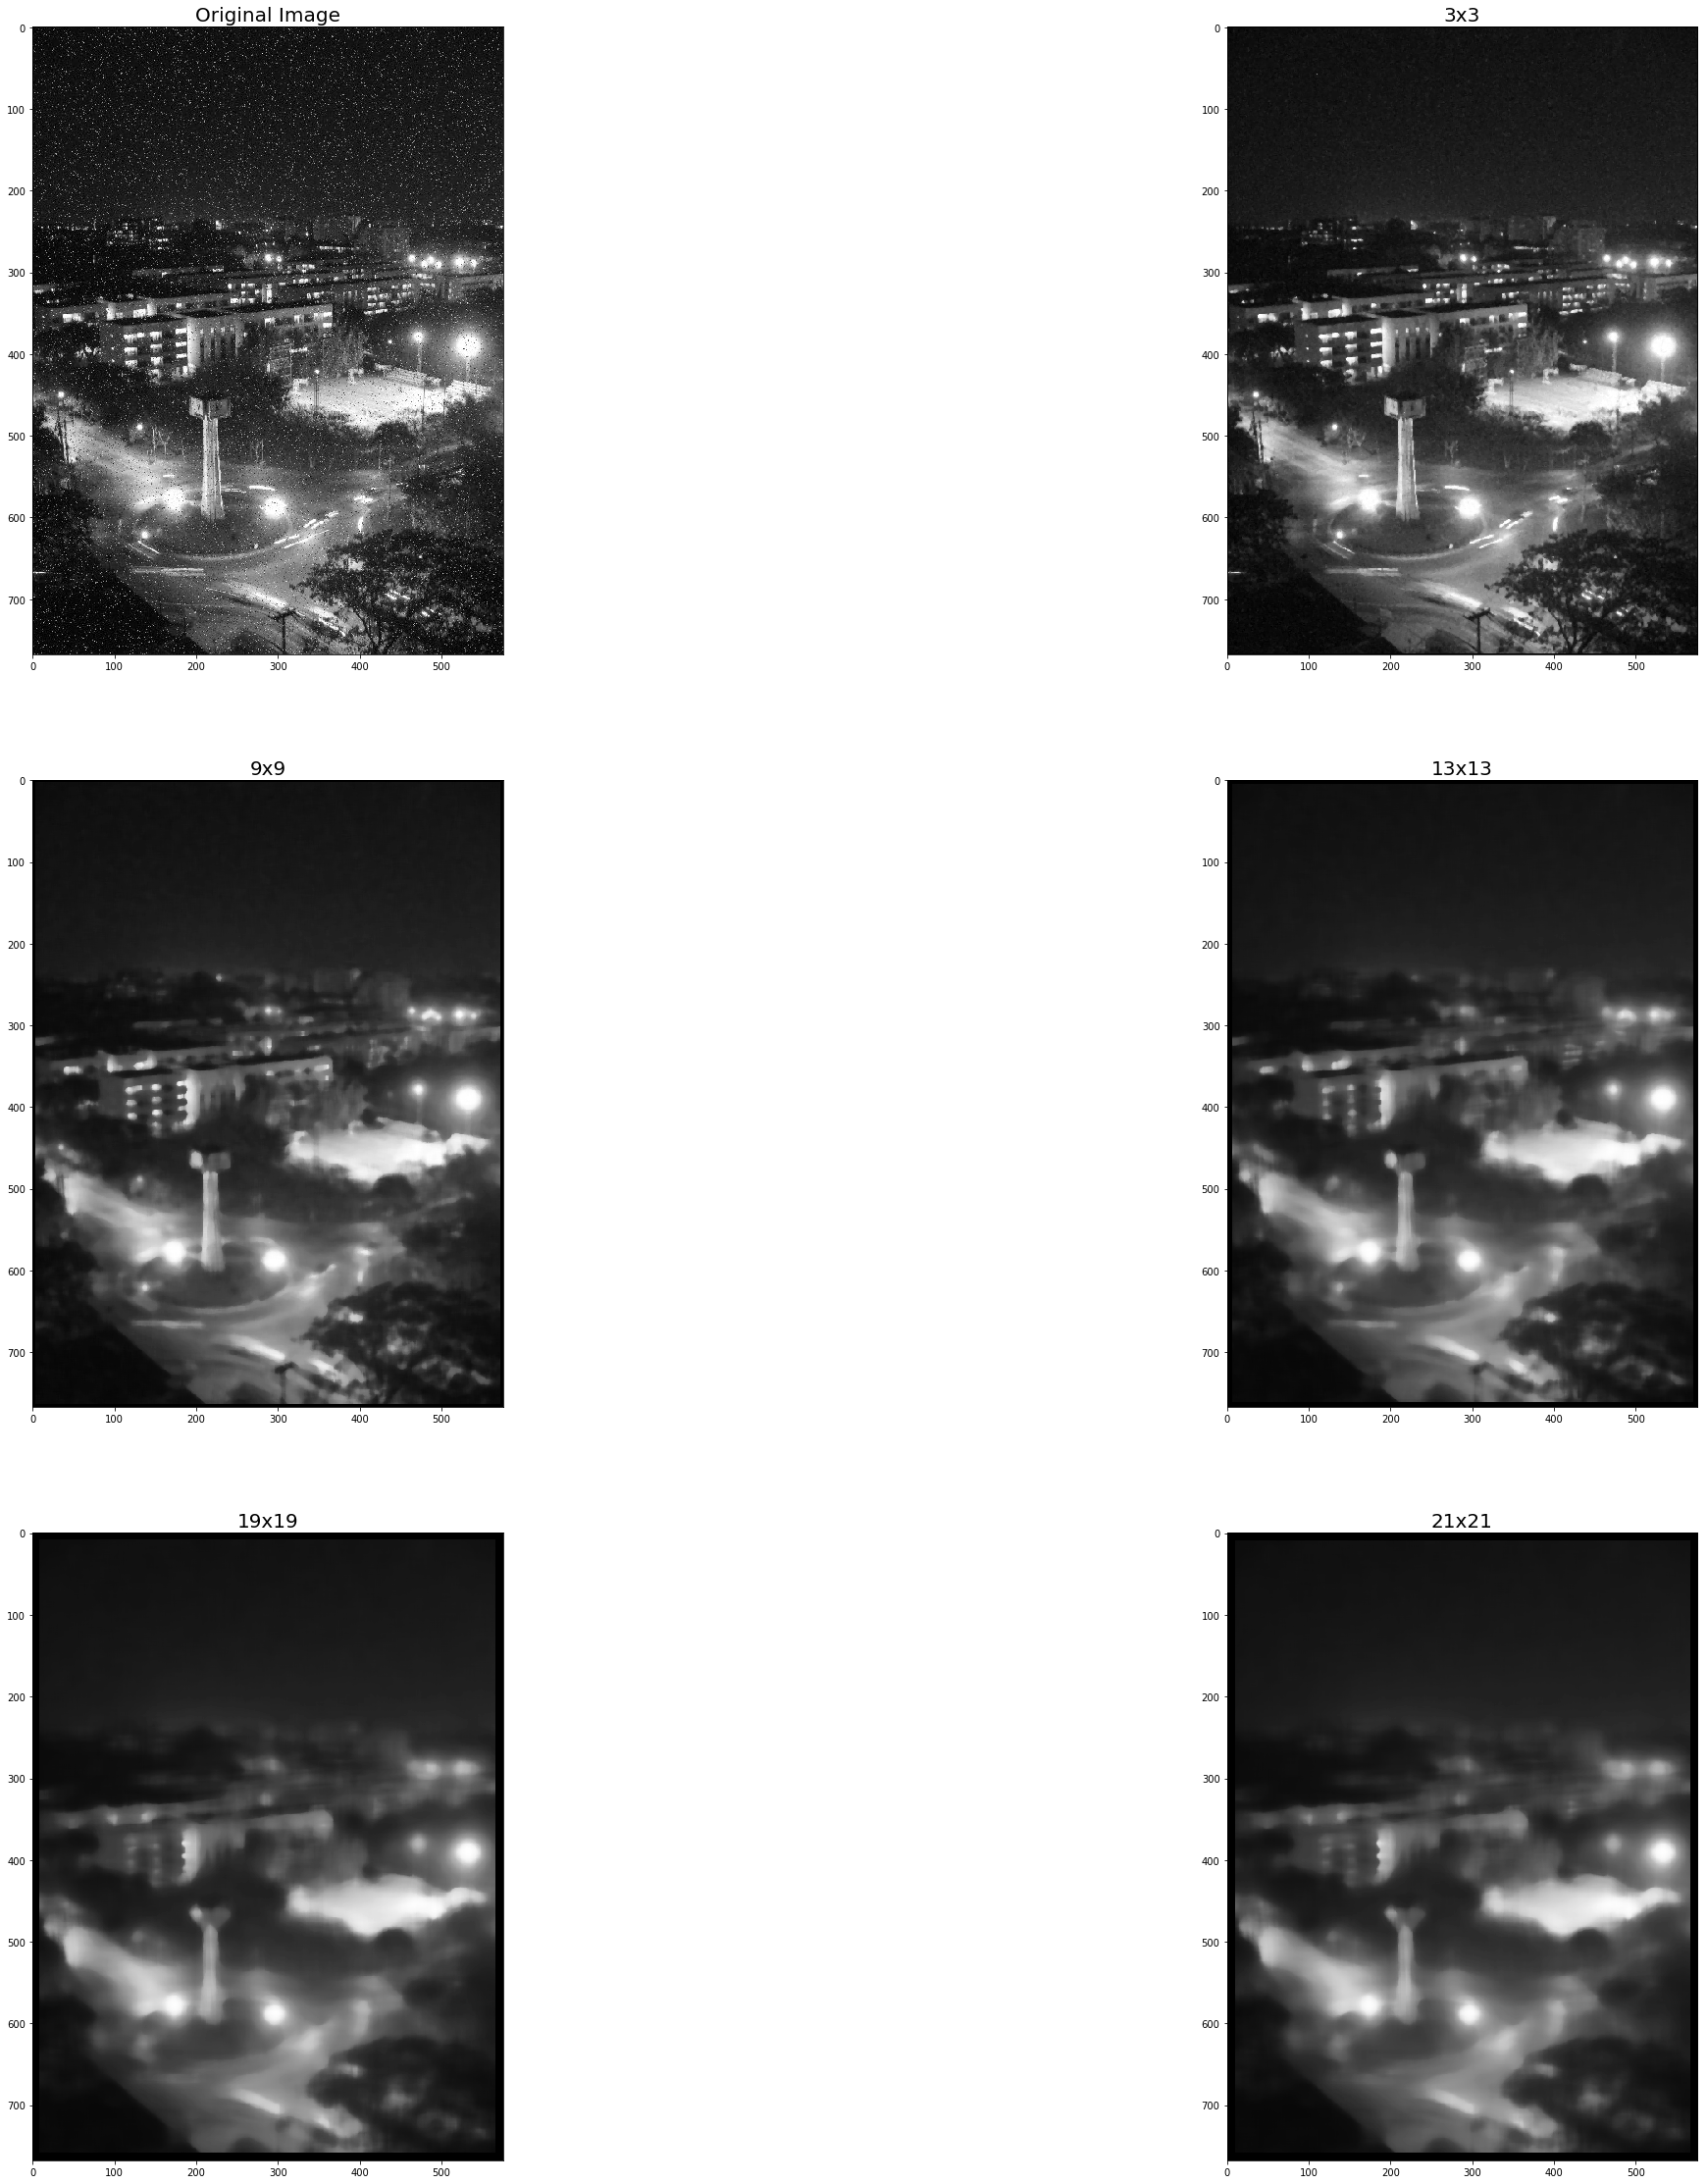

In [12]:
img = cv2.imread('../input_data/Degraded.jpg', cv2.IMREAD_GRAYSCALE)
images = []
images.append(img)
k_size = [3, 9, 13, 19, 21]
efficient_time_tower = []
subtitles = []
subtitles.append('Original Image')
for t in k_size:
    start = time.time()
    images.append(efficient_median_filter(img, t))
    efficient_time_tower.append(time.time() - start)
    subtitles.append(str(t) + "x" + str(t))
display_images(images, 3, 2, (40, 40), 'title', subtitles)

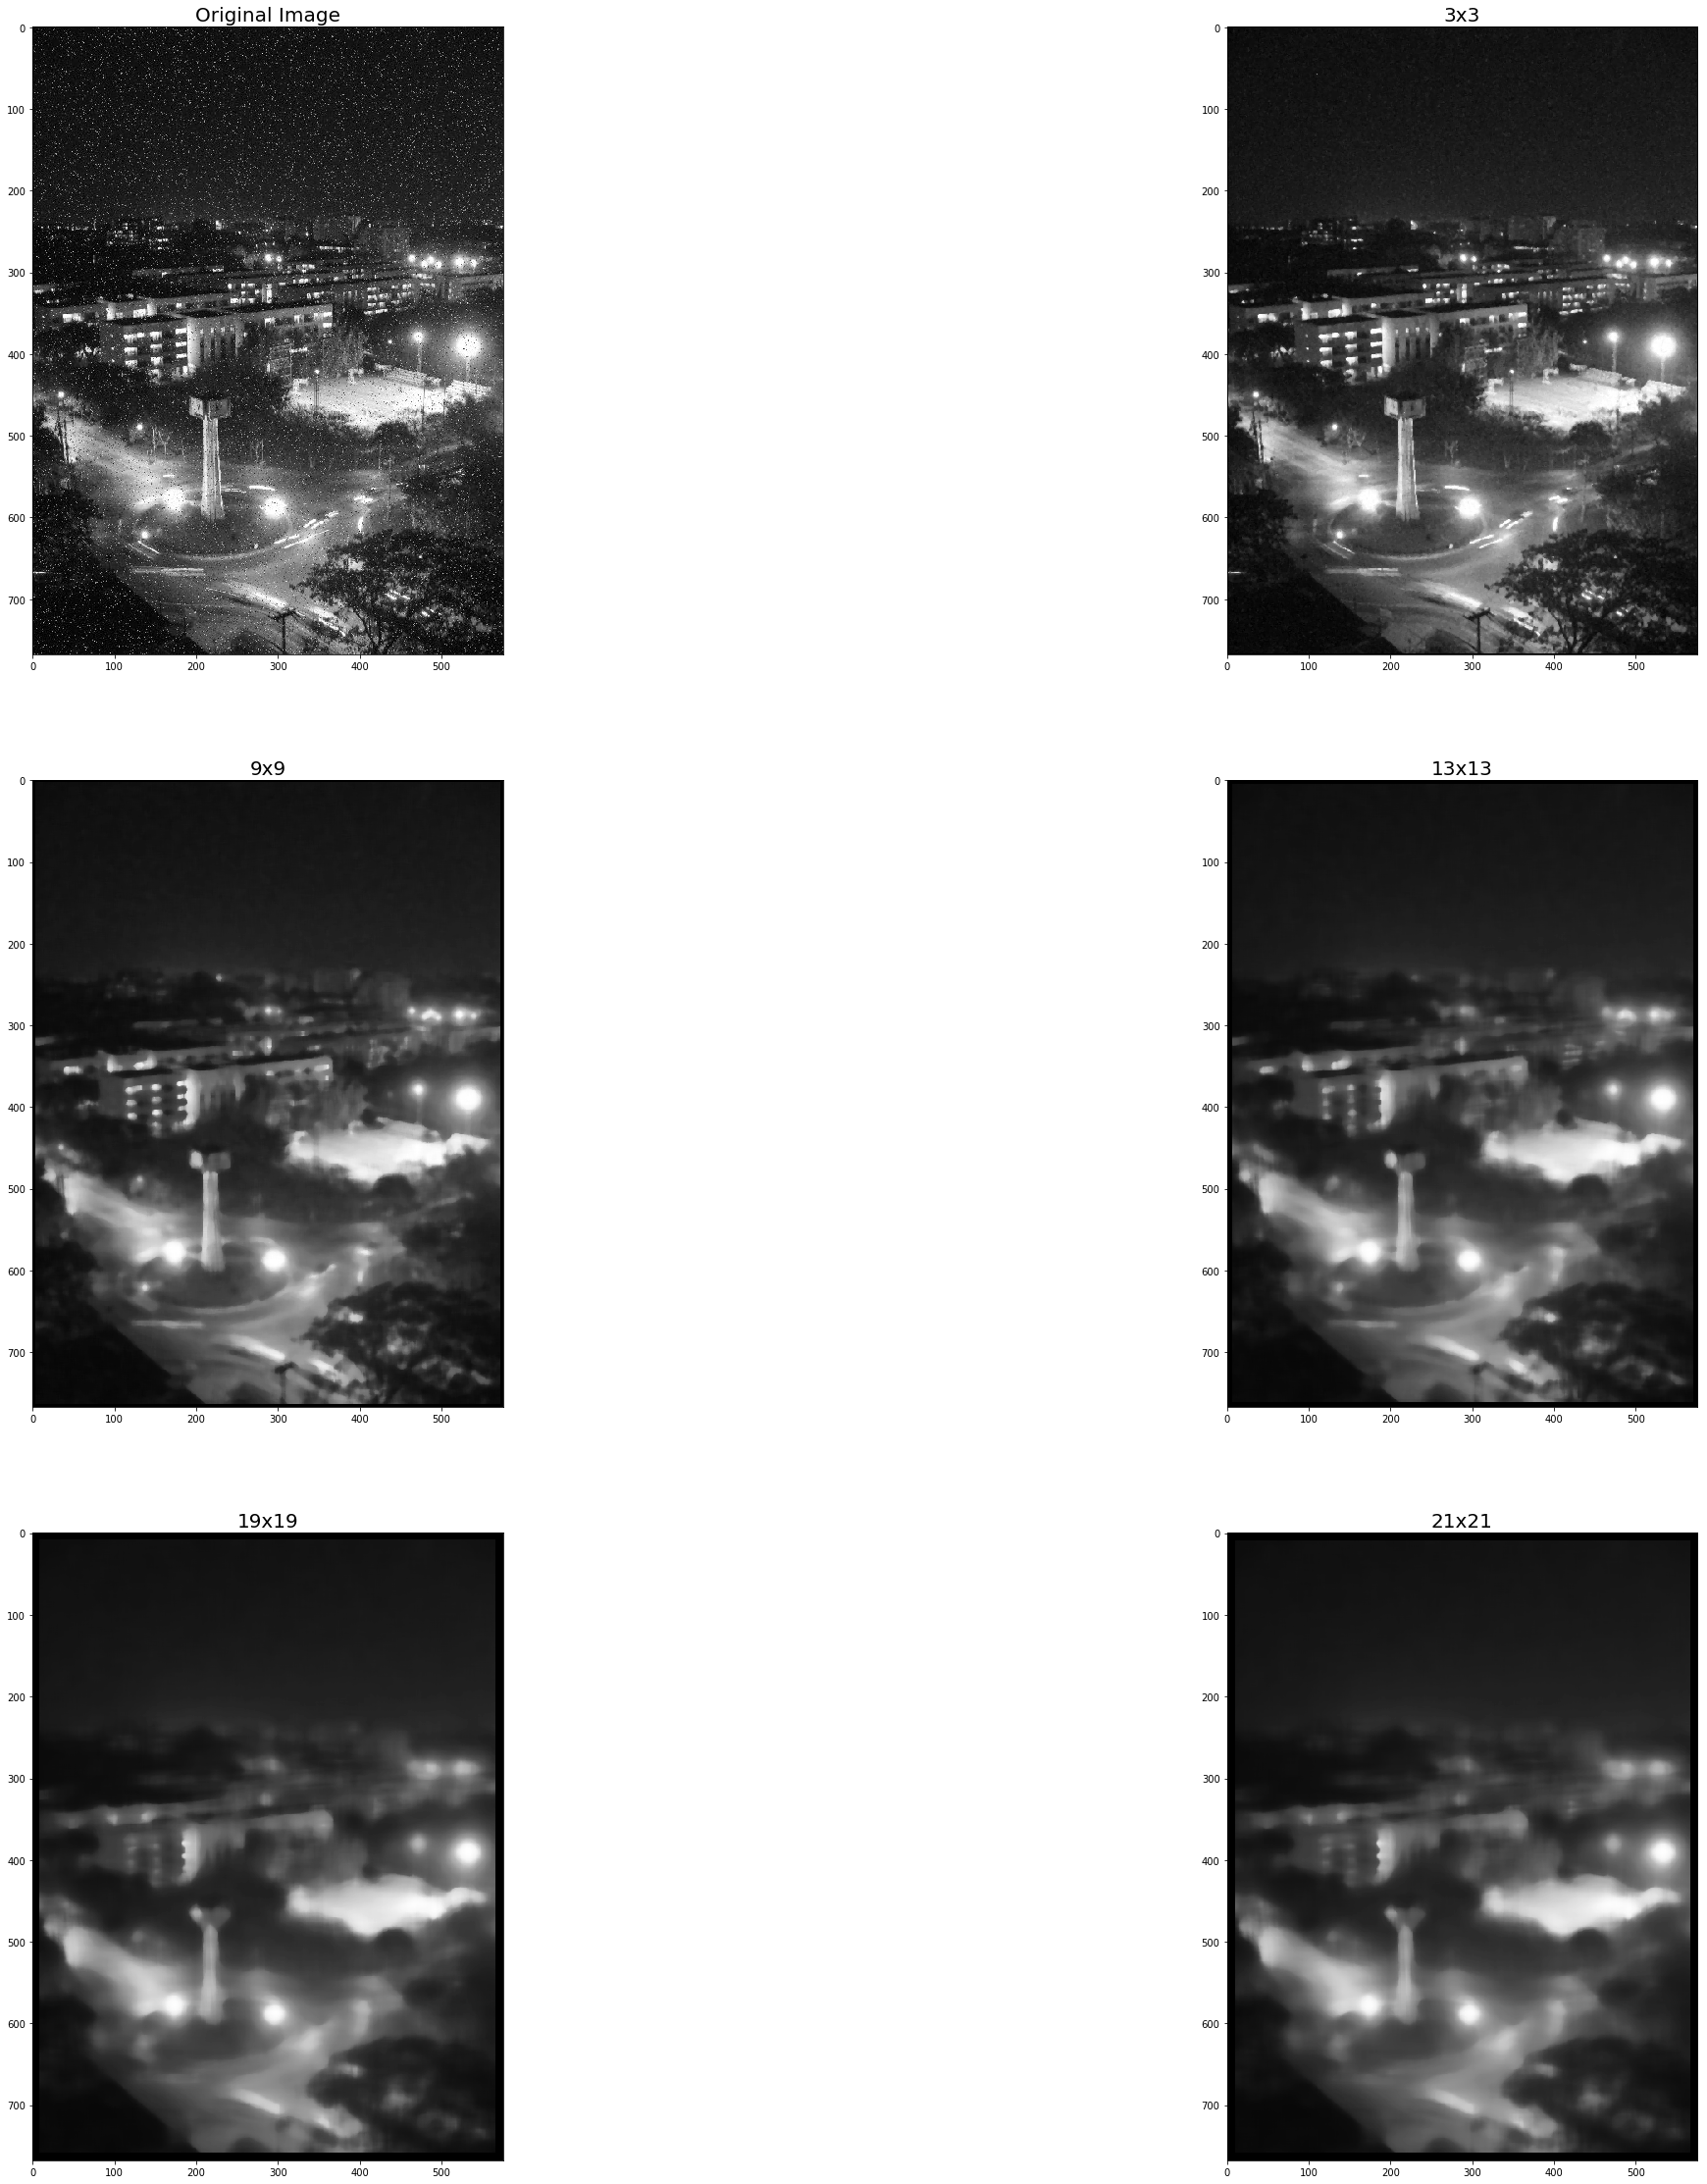

In [13]:
img = cv2.imread('../input_data/Degraded.jpg', cv2.IMREAD_GRAYSCALE)
images = []
images.append(img)
k_size = [3, 9, 13, 19, 21]
inefficient_time_tower = []
subtitles = []
subtitles.append('Original Image')
for t in k_size:
    start = time.time()
    images.append(inefficient_median_filter(img, t))
    inefficient_time_tower.append(time.time() - start)
    subtitles.append(str(t) + "x" + str(t))
display_images(images, 3, 2, (40, 40), 'title', subtitles)

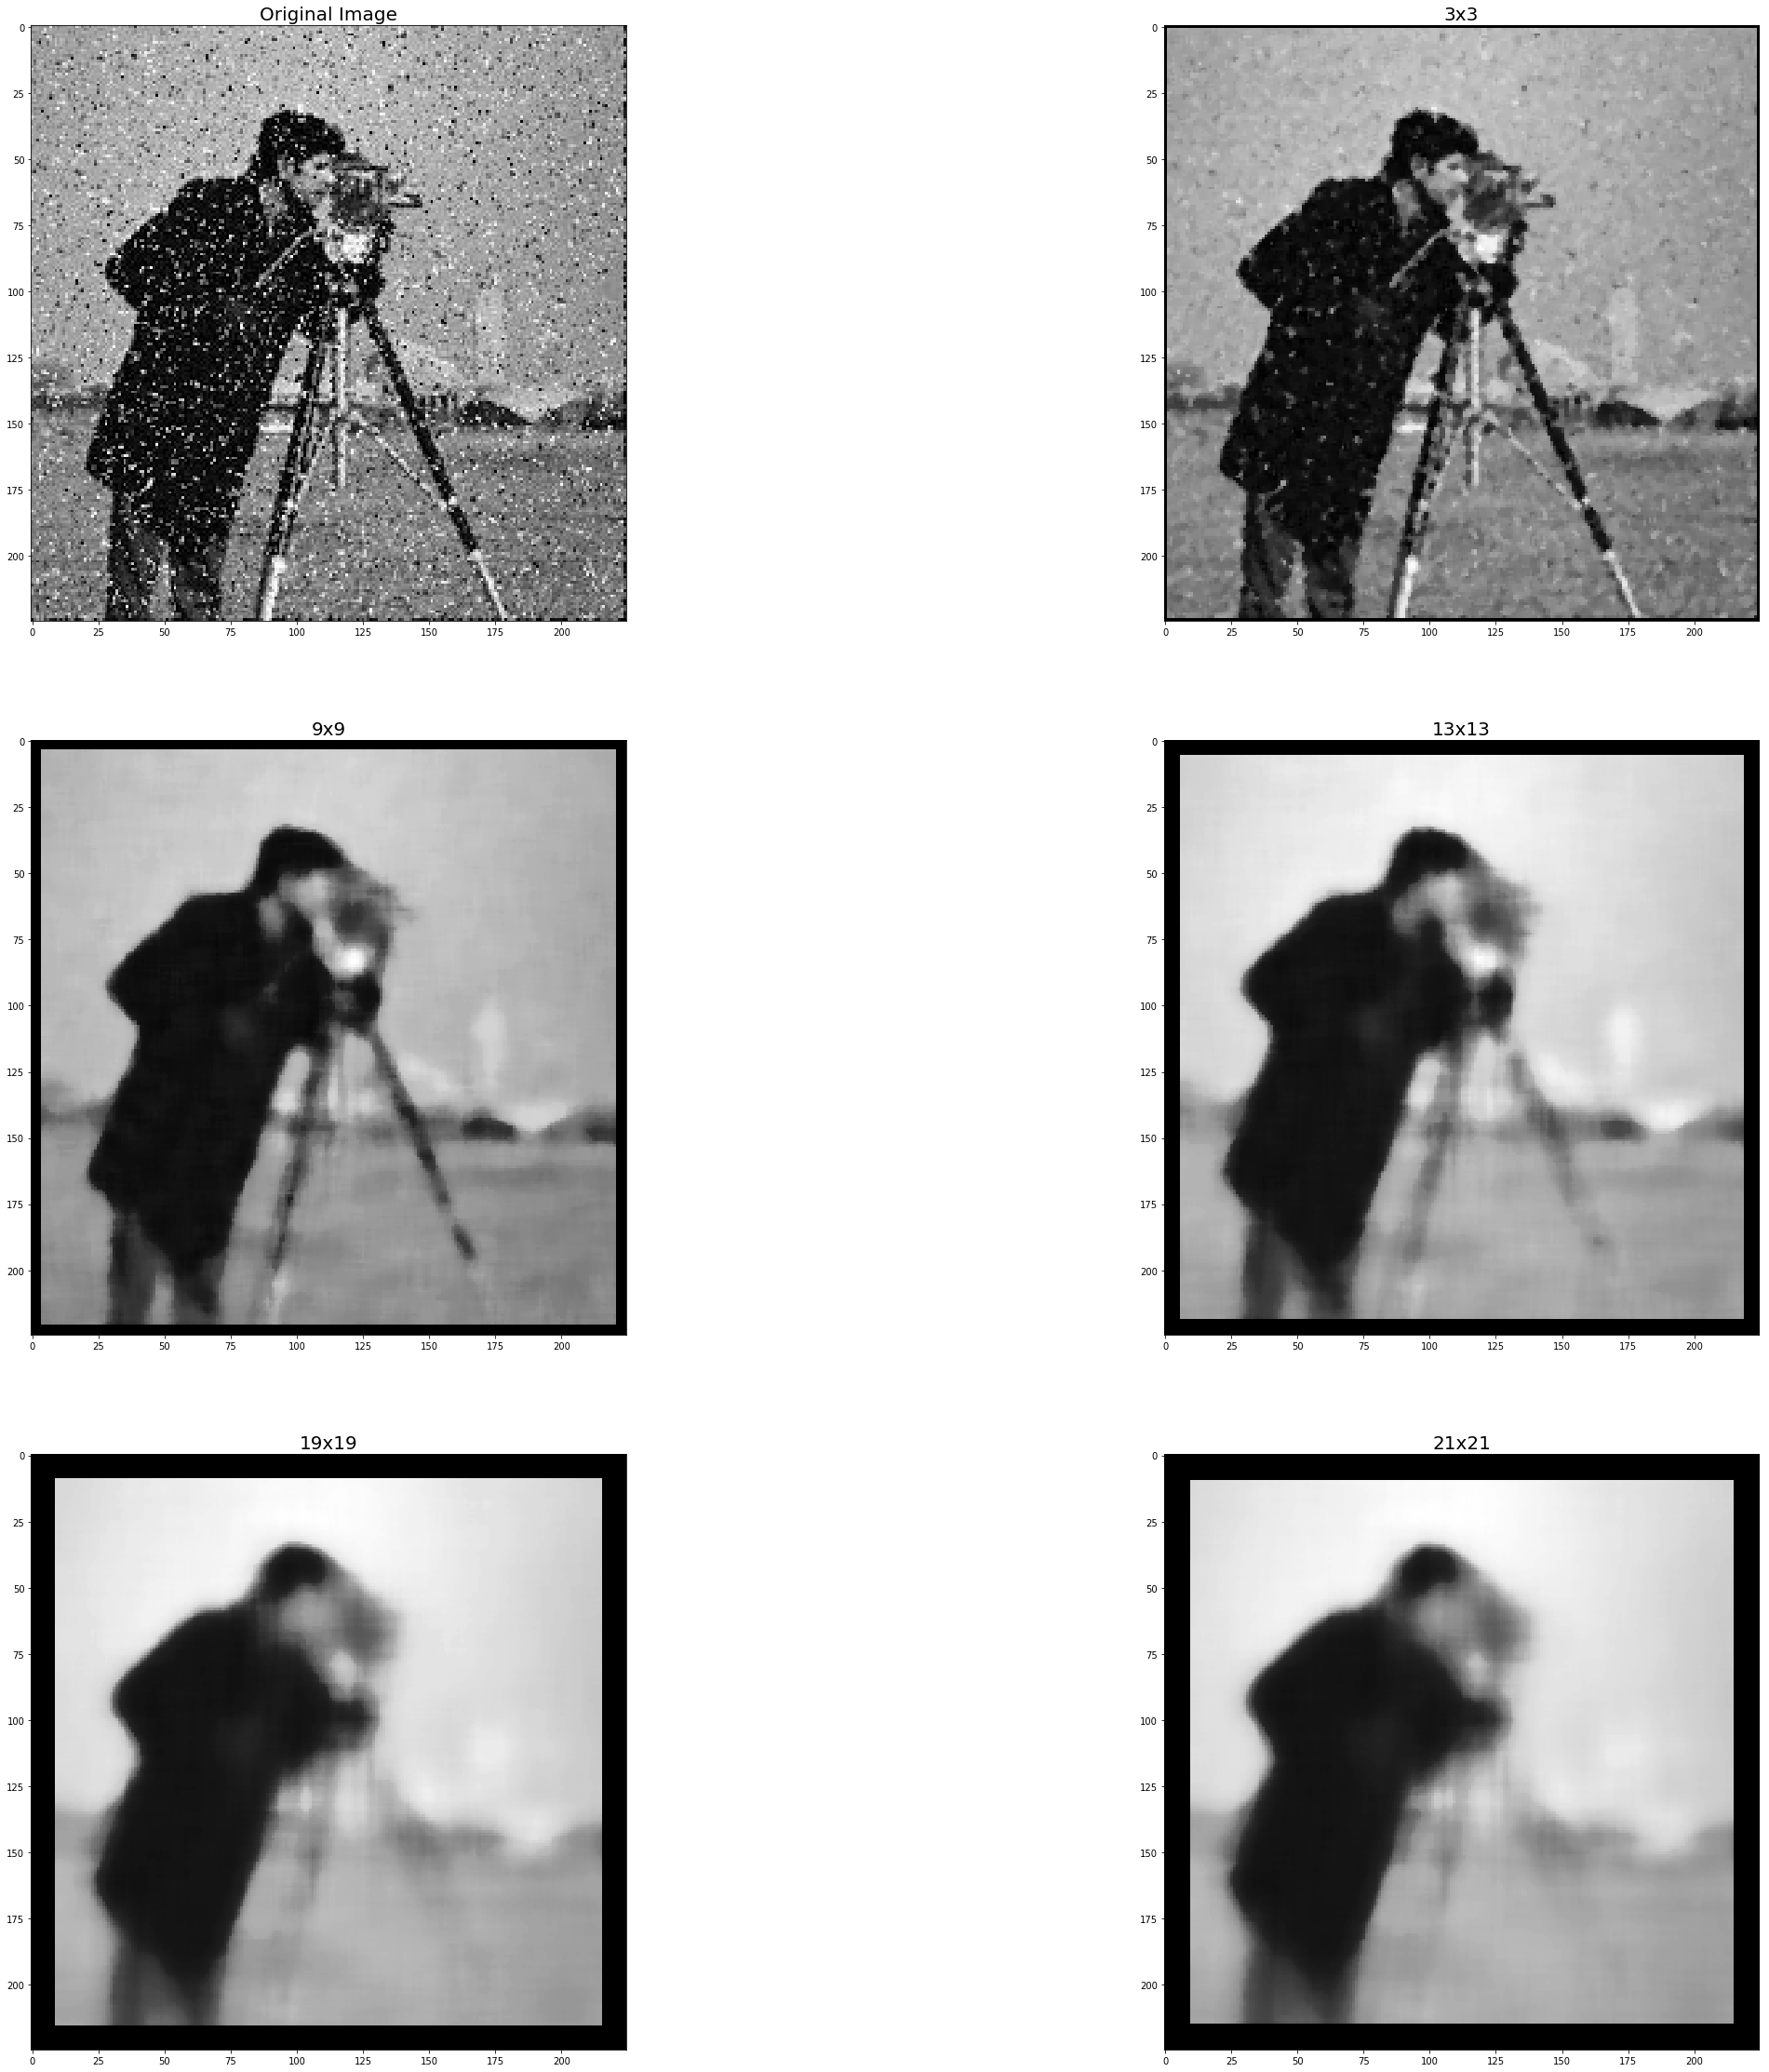

In [14]:
img = cv2.imread('../input_data/salt_pepper.jpeg', cv2.IMREAD_GRAYSCALE)
images = []
images.append(img)
k_size = [3, 9, 13, 19, 21]
efficient_time_noise = []
subtitles = []
subtitles.append('Original Image')
for t in k_size:
    start = time.time()
    images.append(efficient_median_filter(img, t))
    efficient_time_noise.append(time.time() - start)
    subtitles.append(str(t) + "x" + str(t))
display_images(images, 3, 2, (40, 40), 'title', subtitles)

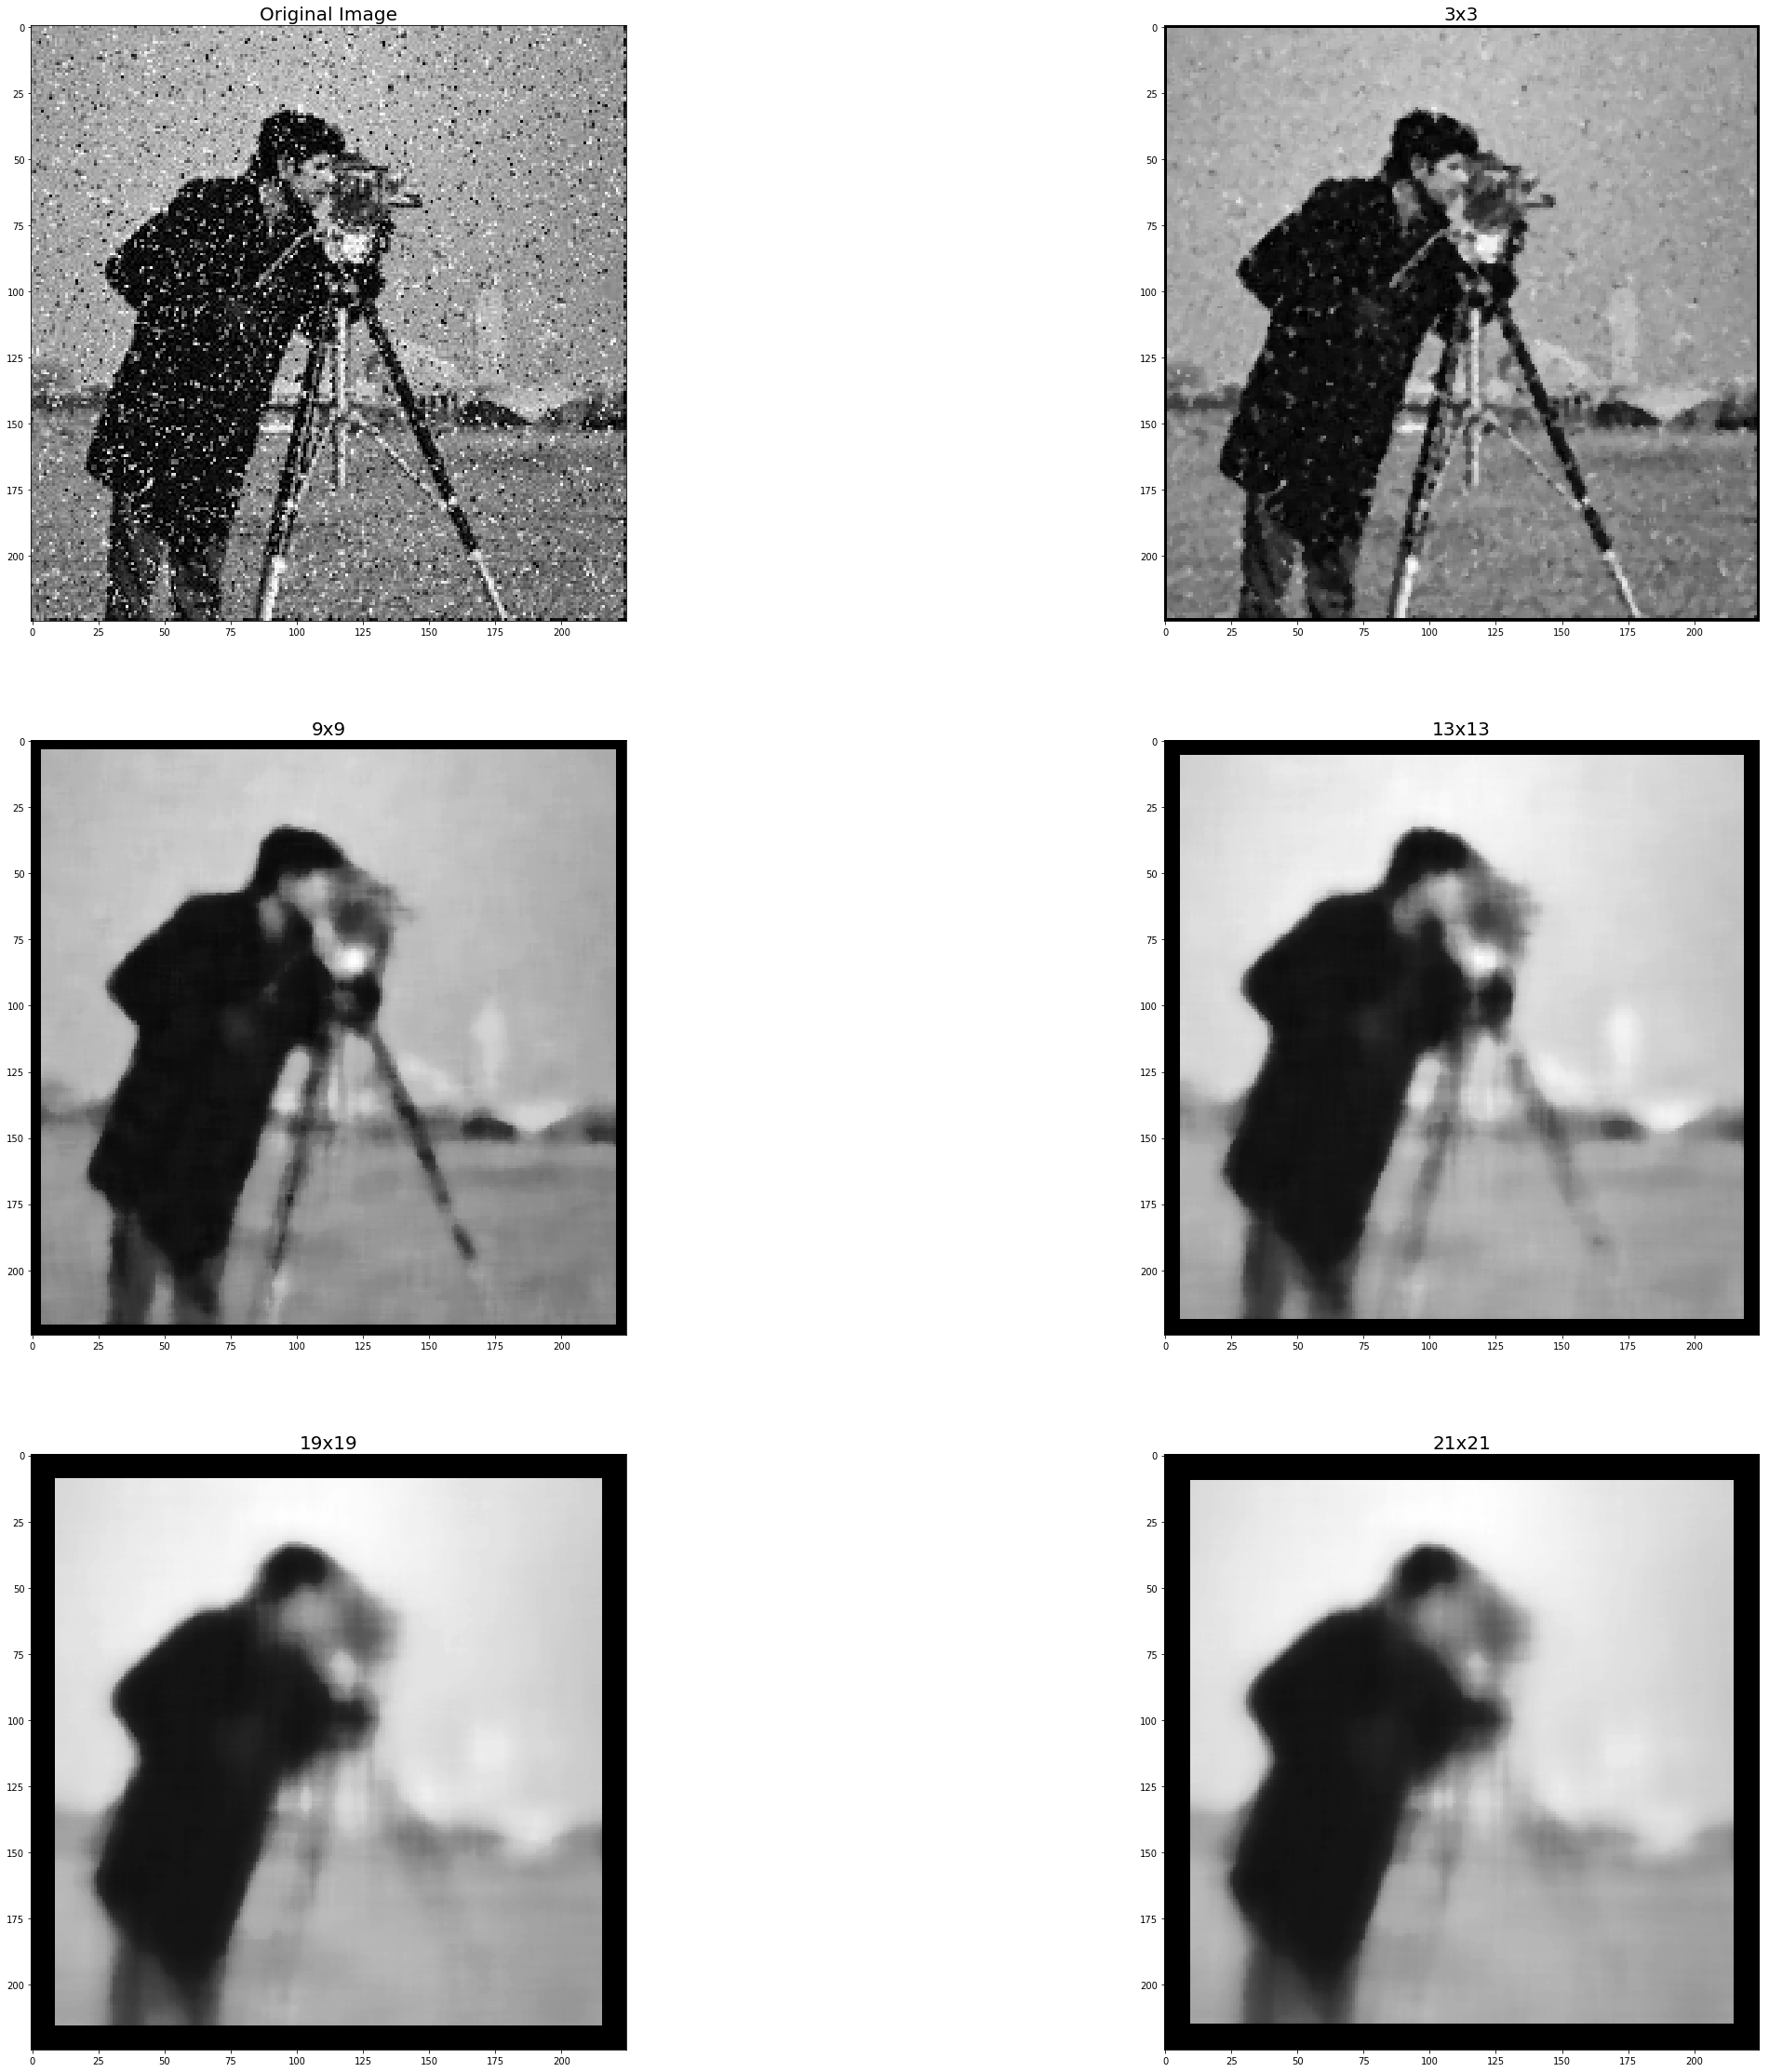

In [15]:
img = cv2.imread('../input_data/salt_pepper.jpeg', cv2.IMREAD_GRAYSCALE)
images = []
images.append(img)
k_size = [3, 9, 13, 19, 21]
inefficient_time_noise = []
subtitles = []
subtitles.append('Original Image')
for t in k_size:
    start = time.time()
    images.append(inefficient_median_filter(img, t))
    inefficient_time_noise.append(time.time() - start)
    subtitles.append(str(t) + "x" + str(t))
display_images(images, 3, 2, (40, 40), 'title', subtitles)

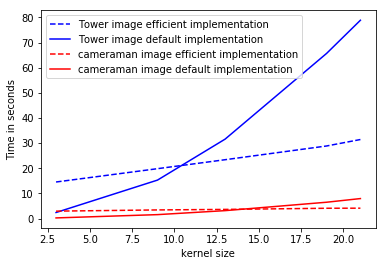

In [16]:
plt.plot(k_size, efficient_time_tower, 'b--', label = 'Tower image efficient implementation')
plt.plot(k_size, inefficient_time_tower, 'b-', label = 'Tower image default implementation')
plt.plot(k_size, efficient_time_noise, 'r--', label = 'cameraman image efficient implementation')
plt.plot(k_size, inefficient_time_noise, 'r-', label = 'cameraman image default implementation')
plt.xlabel('kernel size')
plt.ylabel('Time in seconds')
plt.gca().legend()
plt.show()